In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
pd.set_option('display.max_rows', 18000)
pd.set_option('display.max_columns', 9)
pd.set_option('display.width', 1000)

## Preprocessing

In [3]:
bene = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
inpat = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
outpat = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
train_classification = pd.read_csv("Train-1542865627584.csv")

In [4]:
inpat_bene = pd.merge(inpat, bene, left_on = 'BeneID',right_on = 'BeneID', how = 'left')

In [5]:
outpat_bene = pd.merge(outpat, bene, left_on = 'BeneID',right_on = 'BeneID', how = 'left')

In [6]:
train = pd.concat([inpat_bene, outpat_bene])

In [7]:
train_df = pd.merge(train, train_classification, left_on = 'Provider', right_on = 'Provider', how = 'inner')

In [8]:
train['DOB'] = pd.to_datetime(train['DOB'])
train['DOD'] = pd.to_datetime(train['DOD'])
train['ClaimEndDt'] = pd.to_datetime(train['ClaimEndDt'])
train['ClaimStartDt'] = pd.to_datetime(train['ClaimStartDt'])
train['AdmissionDt'] = pd.to_datetime(train['AdmissionDt'])
train['DischargeDt'] = pd.to_datetime(train['DischargeDt'])

In [9]:
train_df.shape

(558211, 55)

In [10]:
train_df.head(5).transpose()

,0,1,2,3,4
BeneID,BENE11001,BENE17521,BENE21718,BENE22934,BENE24402
ClaimID,CLM46614,CLM34721,CLM72336,CLM73394,CLM32911
ClaimStartDt,2009-04-12,2009-01-20,2009-10-17,2009-10-25,2009-01-08
ClaimEndDt,2009-04-18,2009-02-01,2009-11-04,2009-10-29,2009-01-12
Provider,PRV55912,PRV55912,PRV55912,PRV55912,PRV55912
InscClaimAmtReimbursed,26000,19000,17000,13000,3000
AttendingPhysician,PHY390922,PHY349293,PHY334706,PHY390614,PHY380413
OperatingPhysician,NaN,PHY370861,PHY334706,PHY323689,PHY432598
OtherPhysician,NaN,PHY363291,NaN,PHY363291,NaN
AdmissionDt,2009-04-12,2009-01-20,2009-10-17,2009-10-25,2009-01-08


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   AdmissionDt                      40474 non-null   object 
 10  ClmAdmitDiagnosisCode            145899 non-null  object 
 11  DeductibleAmtPaid                557312 non-null  float64
 12  Di

In [12]:
len(train_df['Provider'].unique())

5410

In [13]:
train_df['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

## Finding the correlation between various columns

In [14]:
train_df.corr()

,InscClaimAmtReimbursed,DeductibleAmtPaid,ClmProcedureCode_1,ClmProcedureCode_2,...,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
InscClaimAmtReimbursed,1.000000,0.665488,-0.145059,0.108619,...,0.383701,0.225477,0.064411,0.030561
DeductibleAmtPaid,0.665488,1.000000,-0.006736,-0.010818,...,0.282815,0.308890,-0.027973,-0.033844
ClmProcedureCode_1,-0.145059,-0.006736,1.000000,0.028000,...,-0.079482,0.022757,0.002233,0.002422
ClmProcedureCode_2,0.108619,-0.010818,0.028000,1.000000,...,0.087785,0.017404,0.044539,0.033314
ClmProcedureCode_3,0.136799,0.036194,0.051397,0.028871,...,0.129844,0.044914,-0.004081,-0.010662
ClmProcedureCode_4,-0.080588,-0.000524,0.072560,0.097080,...,-0.023149,0.004546,0.028952,0.035054
ClmProcedureCode_5,0.662121,NaN,0.727110,0.652015,...,0.657455,0.080297,-0.043286,-0.063975
ClmProcedureCode_6,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN
Gender,-0.002094,-0.002609,-0.003014,-0.002548,...,-0.000214,-0.001831,0.007972,0.005674
Race,-0.000477,-0.002247,0.005233,-0.005658,...,-0.000586,-0.001641,0.012089,0.007520


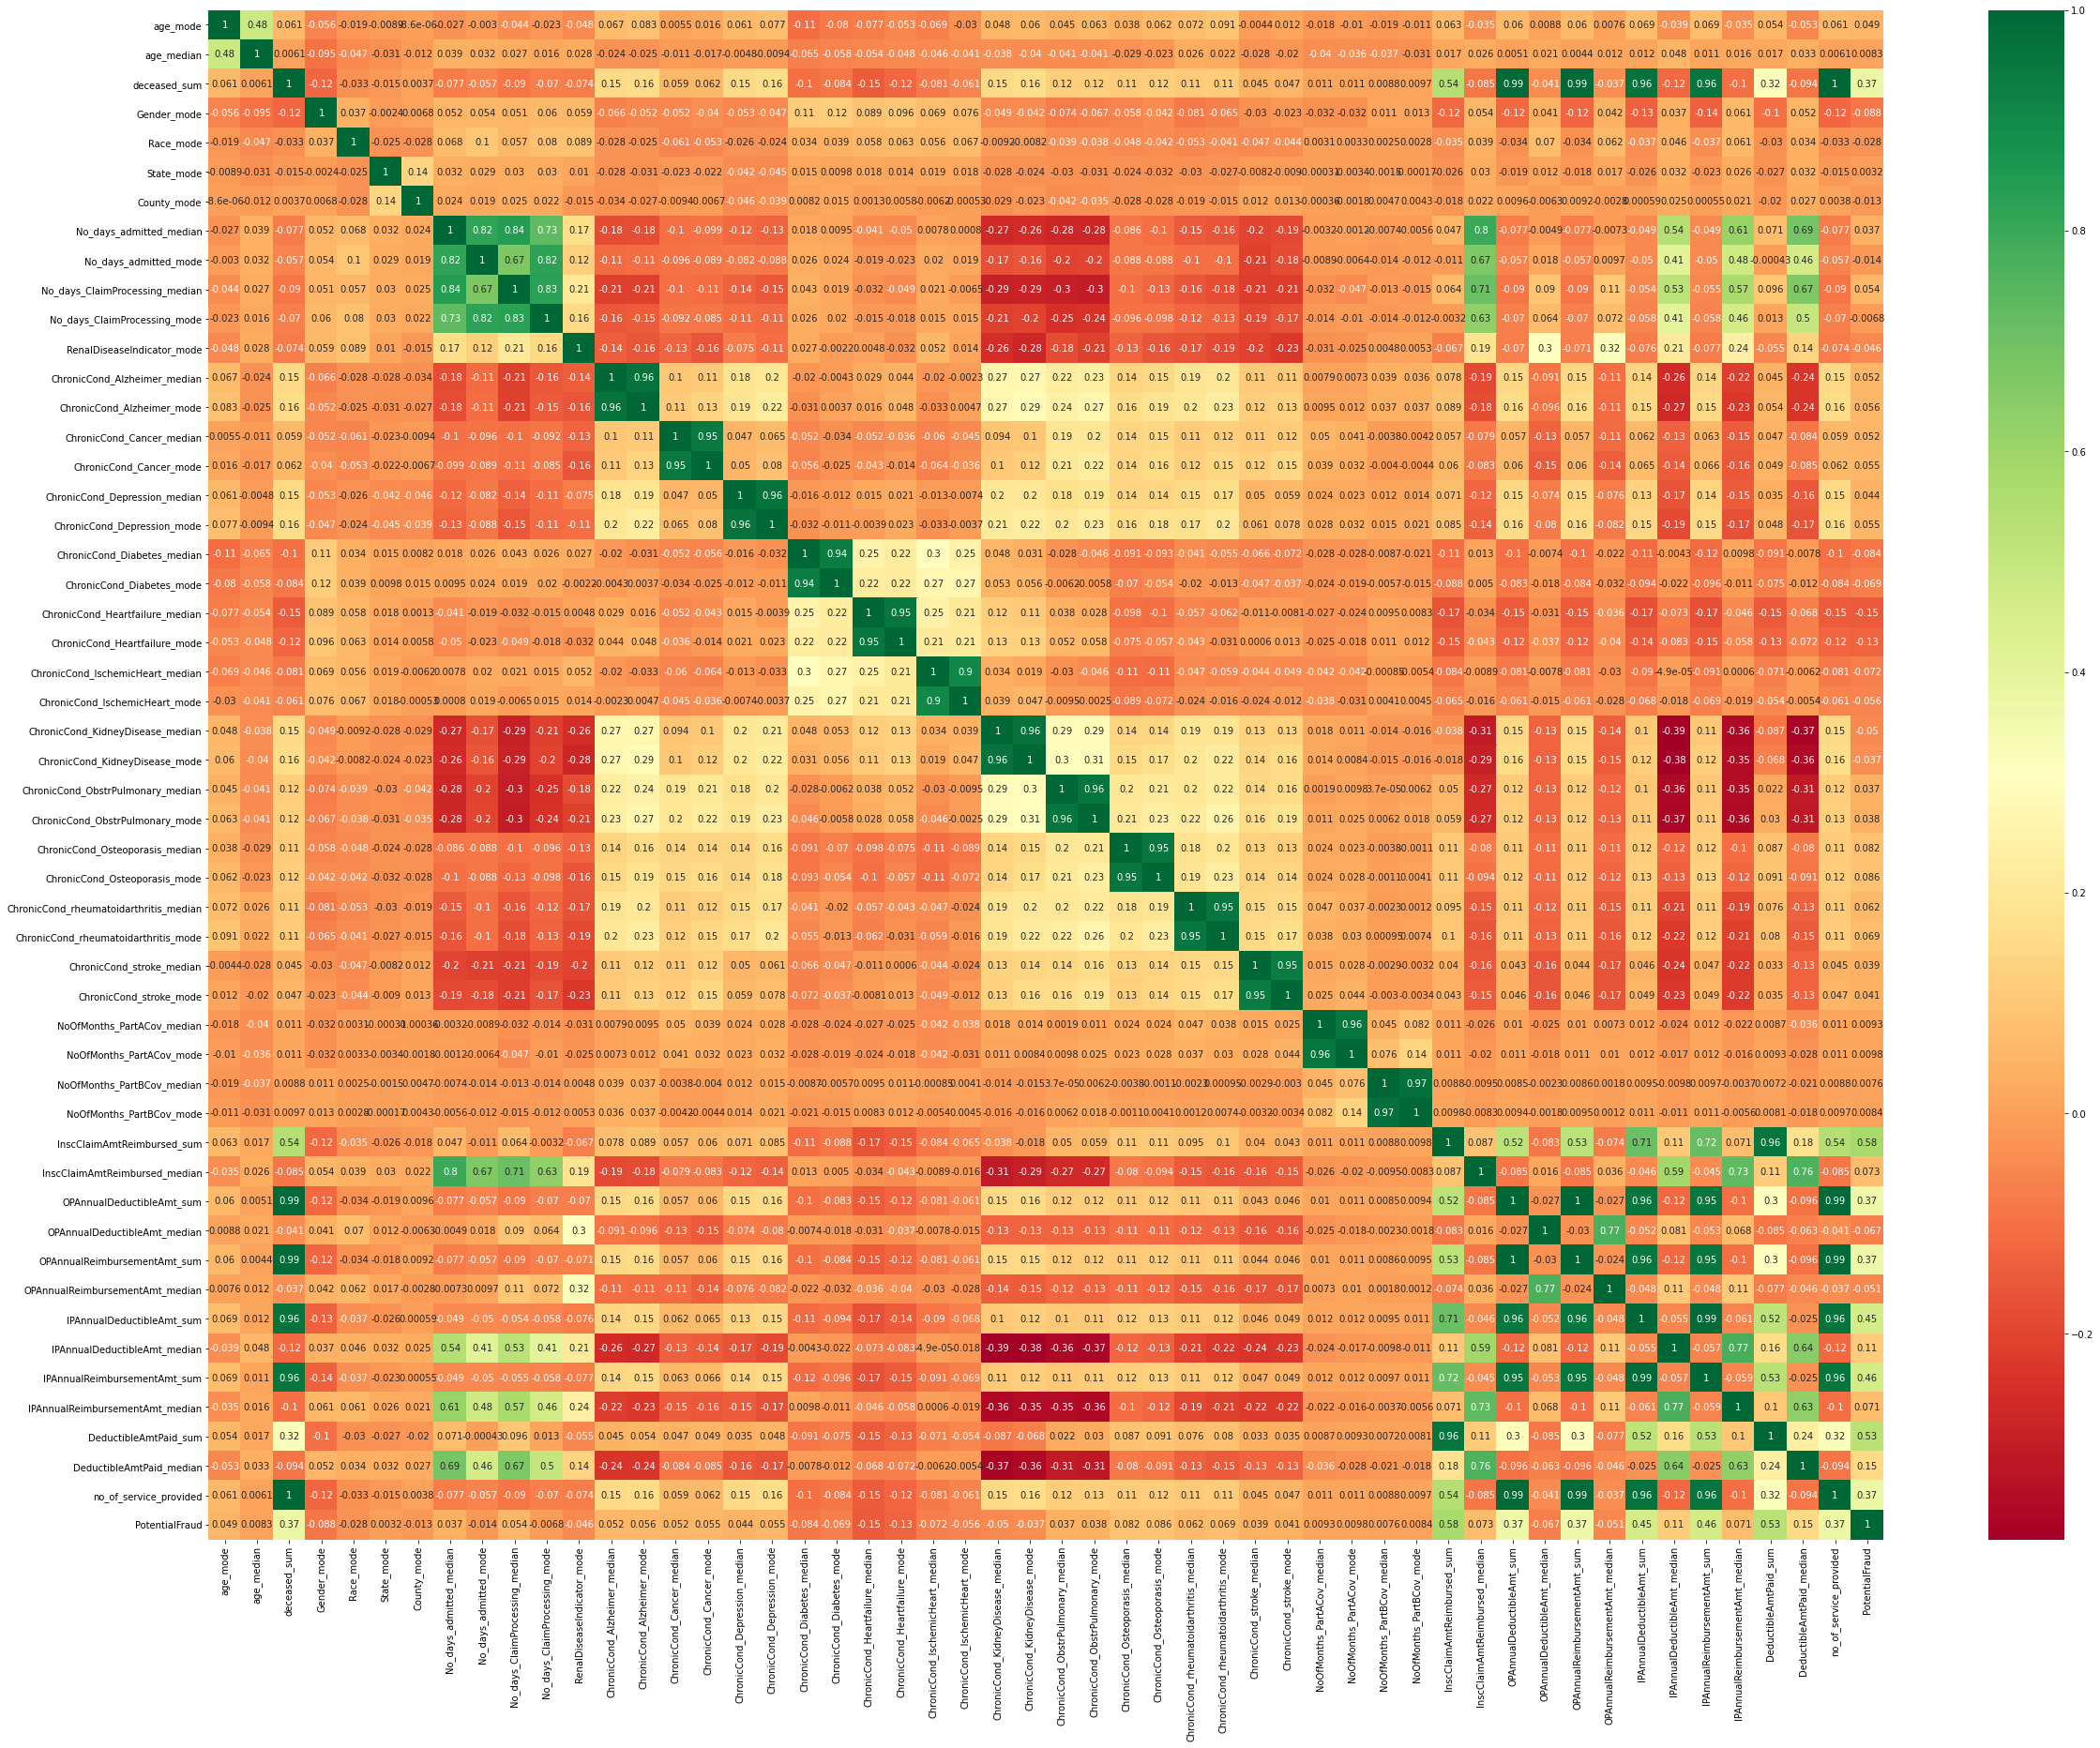

In [12]:
### inroder to get a better picture about the correlation,we are following the below steps 
corr = train_df.corr() 
top_corr_features = corr.index plt.figure(figsize=(40,30)) 
#plot heat map 
g=sns.heatmap(train_df.corr(),annot=True,cmap="RdYlGn")

## Find the Occurance of Fraudulent Transaction?

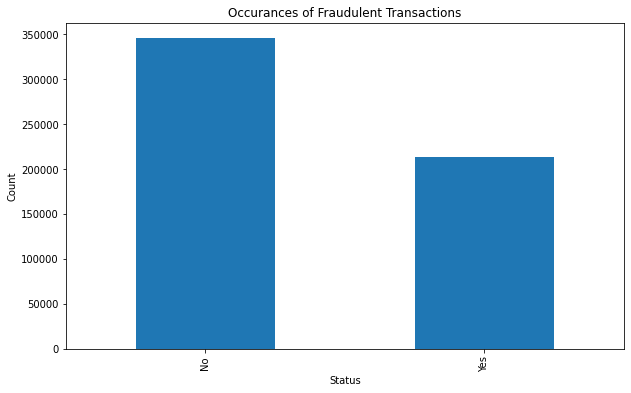

In [16]:
plt.title("Occurances of Fraudulent Transactions")
train_df.groupby( ["PotentialFraud"] ).Provider.count().plot(kind = "bar", figsize = (10,6))
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

## Find the percentage of fradulent transactions grouped by providers

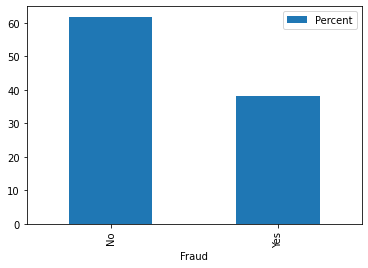

In [17]:
freq_fraud = train_df['PotentialFraud'].value_counts()
potentialFraud_df = freq_fraud.to_frame()
potentialFraud_df.columns = ['count']
potentialFraud_df['Fraud'] = potentialFraud_df.index
potentialFraud_df['Percent'] = (potentialFraud_df['count']/sum(potentialFraud_df['count']))*100
potentialFraud_df.plot(x ='Fraud', y='Percent', kind = 'bar')
plt.show()

In [18]:
train_df['InscClaimAmtReimbursed'].sum()

556543140

Questions??
1. Age during which Fraud is happening
2. Filter by amount and get the amount fields
3. Which physician is commiting the fraud
4. For which diagonasis code, we get maximum frauds
5. Chronic condition and Fraud


## Find the Age of Patients during for which most Frauds happen?

In [19]:
#Find age
train_df['age'] = (np.where(train_df['DOD'].isnull(), 
                           (pd.Timestamp.now()-pd.to_datetime(train_df['DOB'])) / np.timedelta64(1,'Y'), 
                           (pd.to_datetime(train_df['DOD'])-pd.to_datetime(train_df['DOB']))/np.timedelta64(1,'Y'))).astype(int)



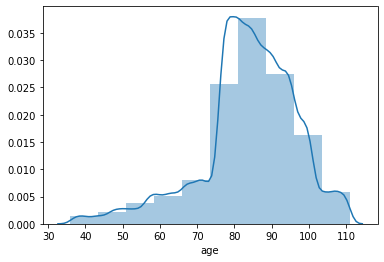

In [20]:
#histogram
allFrauds = train_df[train_df['PotentialFraud'] == 'Yes']
sns.distplot(allFrauds['age'], bins = 10, kde = True)
plt.show()

## Analyze the Various Amount Fields

In [21]:
AmountFields = ['InscClaimAmtReimbursed','IPAnnualReimbursementAmt','IPAnnualDeductibleAmt','OPAnnualReimbursementAmt','OPAnnualDeductibleAmt']
AmountFields_all = train_df[AmountFields]
AmountFields_Frauds = allFrauds[AmountFields]


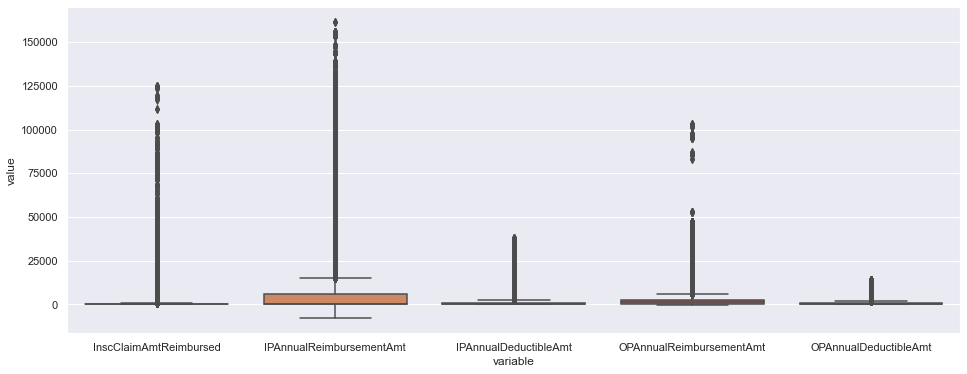

In [22]:
#There are lots of outliers. Which cannot be dropped as they might be significant
plt.figure(figsize=(16, 6))
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(AmountFields_all))
plt.show()

## Analyzing the Amout Fields for Only Fraudulent claims

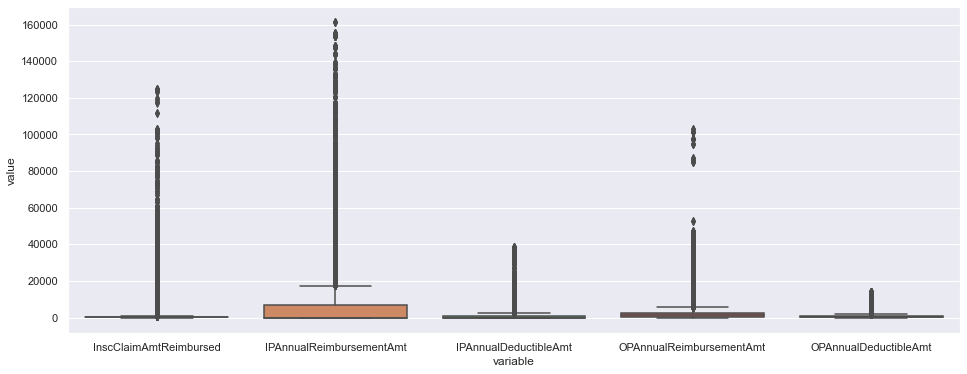

In [23]:
#There are lots of outliers.Which cannot be dropped as they might be significant
plt.figure(figsize=(16, 6))
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x="variable", y="value", data=pd.melt(AmountFields_Frauds))
plt.show()

There is no significant difference in the analysis of fraudulent claims & all claims

## Top 20 providers who are frequently committing fraud

In [24]:
allFrauds['Provider'].value_counts().head(20)

PRV51459    8240
PRV53797    4739
PRV51574    4444
PRV53918    3588
PRV54895    3436
PRV55215    3393
PRV52064    2844
PRV56011    2833
PRV55004    2399
PRV57306    2315
PRV56560    2313
PRV52030    2275
PRV52649    2156
PRV54772    2115
PRV52628    2098
PRV51369    2083
PRV51347    2067
PRV55039    2058
PRV57103    2049
PRV52019    1961
Name: Provider, dtype: int64

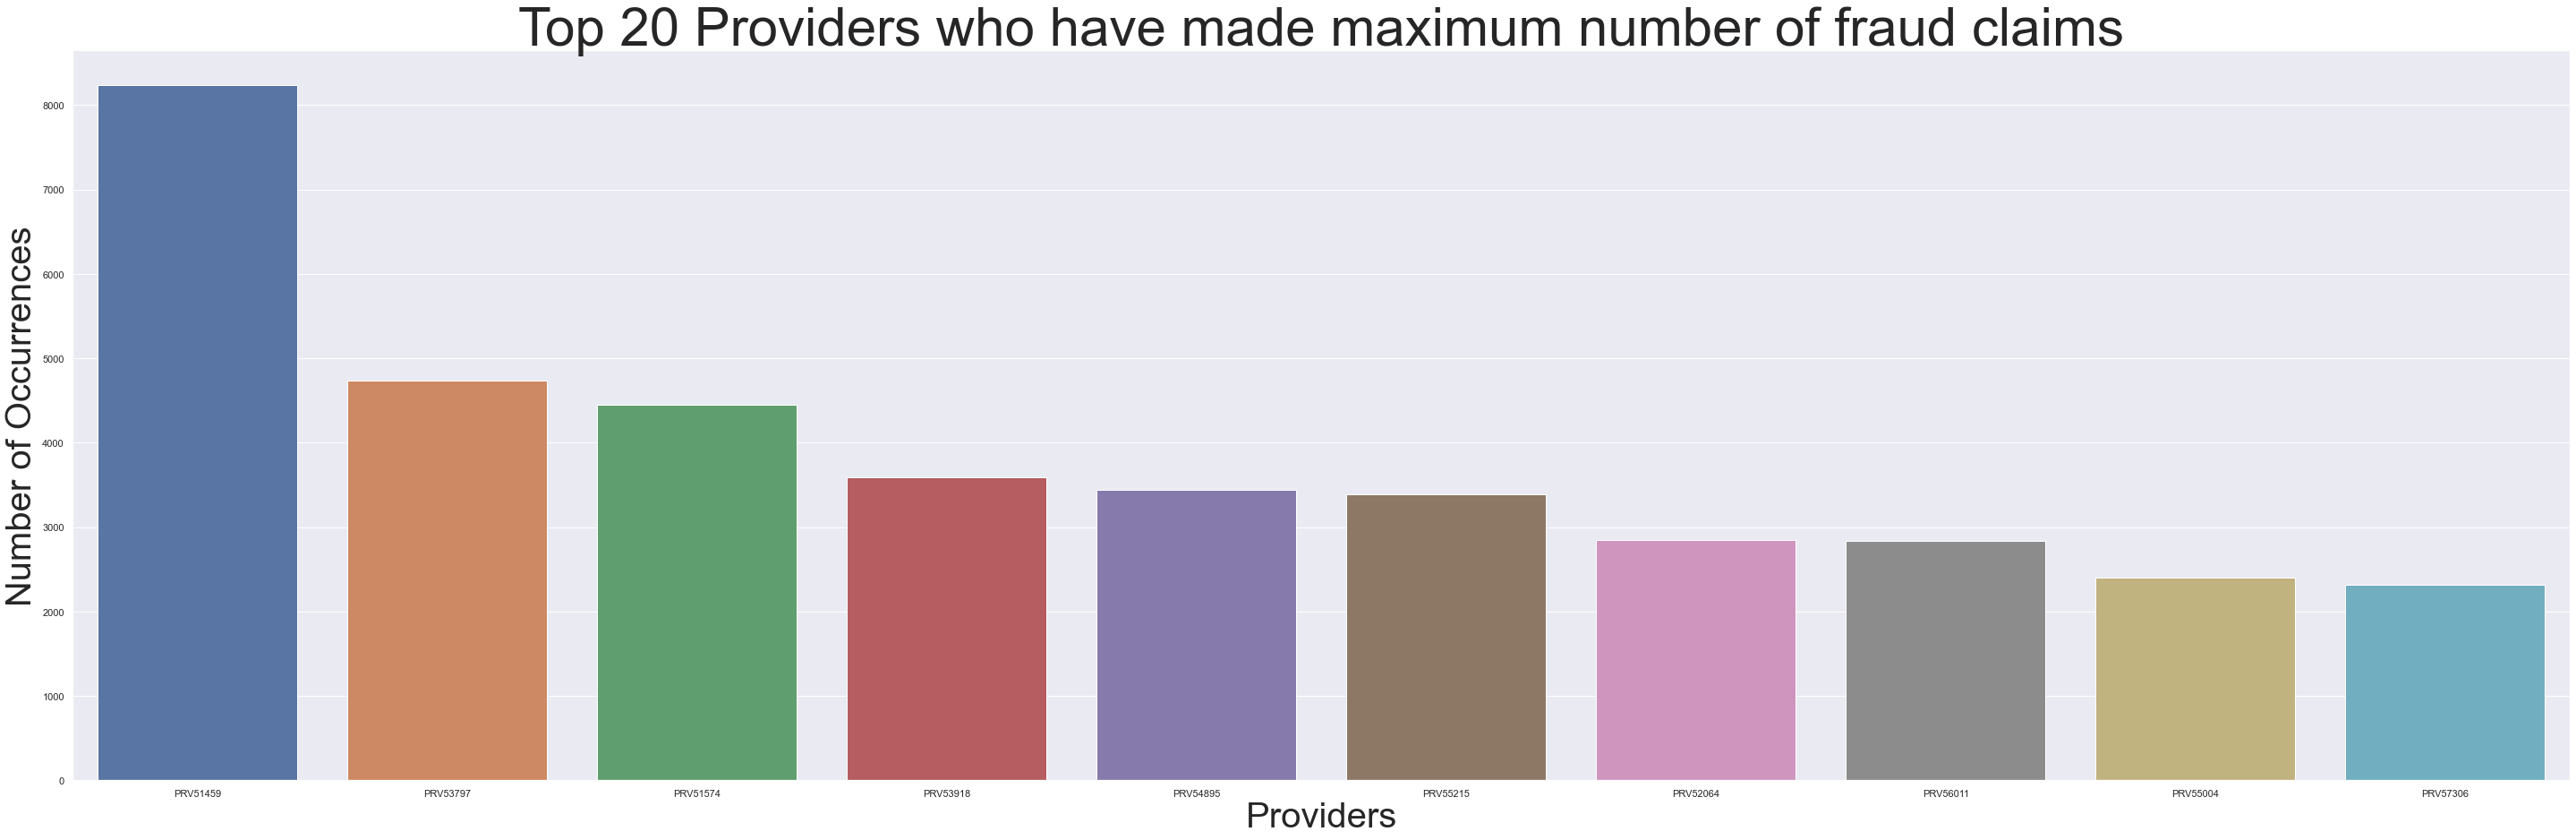

In [25]:
allFraud_count  = allFrauds['Provider'].value_counts()
allFraud_count = allFraud_count[:10,]
plt.figure(figsize=(50,15))
sns.barplot(allFraud_count.index, allFraud_count.values)
plt.title('Top 20 Providers who have made maximum number of fraud claims', fontsize=60)
plt.ylabel('Number of Occurrences', fontsize=40)
plt.xlabel('Providers', fontsize=40)
plt.show()

## Finding out the Physisicans who were part of this scam

Count of all physicians grouped by providers

In [26]:
by_Provider = train_df.groupby('Provider')
by_Provider_sub = by_Provider[['PotentialFraud','AttendingPhysician','OperatingPhysician','OtherPhysician']]
aggregated = by_Provider_sub.count()
aggregated.head(20)

,PotentialFraud,AttendingPhysician,OperatingPhysician,OtherPhysician
Provider,,,,
PRV51001,25,25,5,10
PRV51003,132,132,45,25
PRV51004,149,149,27,63
PRV51005,1165,1163,222,478
PRV51007,72,72,12,26
PRV51008,43,43,6,17
PRV51011,58,58,12,21
PRV51012,48,47,8,16
PRV51013,46,46,11,15


In [27]:
import sqlite3
cnx = sqlite3.connect(':memory:')

In [28]:
train_df.to_sql('insurance_fraud', con=cnx, if_exists='append', index=False)

In [29]:
#function for the SQL queries below
def sql_query(query):
    return pd.read_sql(query, cnx)

## Top 10 InscClaimAmtReimbursed which are fraudulent

In [30]:
query = '''
SELECT Provider,MAX(InscClaimAmtReimbursed) as max_InscClaimAmtReimbursed
FROM insurance_fraud
where PotentialFraud = 'Yes'
group by Provider
order by max_InscClaimAmtReimbursed desc 
limit 10;
'''

sql_query(query)

,Provider,max_InscClaimAmtReimbursed
0,PRV52815,125000
1,PRV53461,125000
2,PRV54742,125000
3,PRV55172,125000
4,PRV54942,124000
5,PRV52467,123000
6,PRV57173,120000
7,PRV53706,119000
8,PRV51119,118000
9,PRV52077,112000


## top 10 providers & their count of fraudulent claims

In [31]:
query = '''
select Provider, PotentialFraud, count(*) as top_10_scam_count
from insurance_fraud
where PotentialFraud='Yes'
group by Provider, PotentialFraud
order by top_10_scam_count desc
limit 10;
'''
sql_query(query)

,Provider,PotentialFraud,top_10_scam_count
0,PRV51459,Yes,8240
1,PRV53797,Yes,4739
2,PRV51574,Yes,4444
3,PRV53918,Yes,3588
4,PRV54895,Yes,3436
5,PRV55215,Yes,3393
6,PRV52064,Yes,2844
7,PRV56011,Yes,2833
8,PRV55004,Yes,2399
9,PRV57306,Yes,2315


In [32]:
# checking if any particular physician of the hospital provider is responsible for the fraudulent claim

print("Checking if any particular physician of the hospital provider is responsible for the fraudulent claim")
print('\n')
query = '''
select Provider,AttendingPhysician,OperatingPhysician,OtherPhysician, count(*) as count
from insurance_fraud
where PotentialFraud = 'Yes'
group by Provider,AttendingPhysician,OperatingPhysician,OtherPhysician
order by count desc
limit 20;
'''
Physicians = sql_query(query)
print(Physicians)
print('\n')
print(" We can see that there were 1332 occurances of fraud claims that happened when AttendingPhysician - PHY330576 was the a part of the claim")
print("---------------------------------------------------------------------------------------------------------------------")



print('\n')
print("Now let us drill down and find the fraud claims made whenever 'PHY330576' was the AttendingPhysician")
print('\n')

physicians_query = '''
select Provider, AttendingPhysician, PotentialFraud, count(*) as count
from insurance_fraud
where Provider = 'PRV53918' 
group by Provider, AttendingPhysician, PotentialFraud
order by count desc;
'''
Physicians_PRV53918 = sql_query(physicians_query)
print(Physicians_PRV53918.head(20))
print('\n')
print('We can see that there were 2534 fraud claims made whenever PHY330576 was the AttendingPhysician')
print("---------------------------------------------------------------------------------------------------------------------")



print('\n')
print('Let us check the total fraudulent and real claims done by the corresponding provider')
print('\n')

PRV53918_query = '''
select Provider, PotentialFraud, count(*) as count
from insurance_fraud
where Provider = 'PRV53918' 
group by Provider, PotentialFraud
order by count desc;
'''

print(sql_query(PRV53918_query))
print('\n')
print('It looks like all the claims by the provider were fraudulent')

Checking if any particular physician of the hospital provider is responsible for the fraudulent claim


    Provider AttendingPhysician OperatingPhysician OtherPhysician  count
0   PRV53918          PHY330576               None           None   1332
1   PRV51567          PHY350277               None           None    813
2   PRV53797          PHY412132               None           None    661
3   PRV51459          PHY338032               None           None    631
4   PRV52652          PHY357307               None           None    610
5   PRV51459          PHY423534               None           None    608
6   PRV51459          PHY337425               None           None    603
7   PRV51459          PHY314027               None           None    600
8   PRV51459          PHY357120               None           None    590
9   PRV52628          PHY432650               None           None    587
10  PRV51459          PHY327046               None           None    586
11  PRV51459        

In [51]:
#End

In [ ]:
## Aim: To find which code is frequent in all the fraudlent claims

In [ ]:
# Column Background: codes (ClmDiagnosisCode_1, ClmDiagnosisCode_1,..etc) are like flags. 
# Aim: To find which code is frequent in all the fraudlent claims.
# we are grouping by providers (P.S: Providers are not unique here)
# again sub grouping all of them by the codes
# Excluding Nan & None from all the codes
# setting the filter condition (i.e) PotentialFraud='Yes'
# aggregating all the groups by count
# creating a outer for ranks
# rank is - partitioned by Providers
#         - ordered by count in descending order
# in the outer query using the filter condition rank=1
# Result: We get the #1 rank of maximum(codes) processed corresponding to claims grouped by providers


query = '''
select * from(select *, dense_rank() over(partition by Provider order by count desc) as code_ranks
from(
    select Provider, ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6, count(*) as count
    from insurance_fraud
    where PotentialFraud='Yes'
--    and Provider = 'PRV51459'
    and
    (ClmDiagnosisCode_1 not in ('NaN', 'None')
        or ClmDiagnosisCode_1 not in ('NaN', 'None')
        or ClmDiagnosisCode_3 not in ('NaN', 'None')
        or ClmDiagnosisCode_4  not in ('NaN', 'None')
        or ClmDiagnosisCode_5  not in ('NaN', 'None')
        or ClmDiagnosisCode_6 not in ('NaN', 'None')
        or ClmDiagnosisCode_7 not in ('NaN', 'None')
        or ClmDiagnosisCode_8 not in ('NaN', 'None')
        or ClmDiagnosisCode_9 not in ('NaN', 'None')
        or ClmDiagnosisCode_10 not in ('NaN', 'None')
        or ClmProcedureCode_1 not in ('NaN', 'None')
        or ClmProcedureCode_2 not in ('NaN', 'None')
        or ClmProcedureCode_3 not in ('NaN', 'None')
        or ClmProcedureCode_4 not in ('NaN', 'None')
        or ClmProcedureCode_5 not in ('NaN', 'None')
        or ClmProcedureCode_6 not in ('NaN', 'None')
    )
    group by Provider, ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
    ) as A) 
where code_ranks=1
order by count desc;
'''
sql_query(query)



# We can conclude that probability of fraudulent claims is high whenever there is a ClmDiagnosisCode_1

We can conclude that probability of fraudulent claims is high whenever there is a ClmDiagnosisCode_1